<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
### Hidden Layer:
### Output Layer:
### Neuron:
### Weight:
### Activation Function:
### Node Map:
### Perceptron:


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [3]:
df.head()


,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [0]:
def sigmoid(x):
  sig = 1 / (1 + np.exp(-x))
  return sig

In [0]:
def sigmoid_derivative(x):
  sigx = sigmoind(x)
  return sigx * (1-sigx)

In [9]:
weights = 2 * np.random.random((3,1)) -1 
print(weights)

[[ 0.7278826 ]
 [-0.64245731]
 [-0.32873612]]


In [11]:
import numpy as np

np.random.seed(2)

inputs = np.array(df)
inputs

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 0]])

In [19]:
correct_outputs = [[1], [1], [1], [0]]

for itereation in range(10000):
  # weighted sum of inputs / weights
  weighted_sum = np.dot(inputs, weights)

  # activate
  activated_output = sigmoid(weighted_sum)

  # cac error 
  error = correct_outputs - activated_output 

  adjustments = error * sigmoid_derivative(weighted_sum)

  # update weights
  weights += np.dot(inputs.T, adjustments)


print("weights after trianing", weights)
print("Output after training", activated_output)


weights after trianing [[-2.40751698]
 [-2.41310263]
 [ 7.49047738]]
Output after training [[0.99944189]
 [0.99383639]
 [0.99380208]
 [0.00799772]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [21]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [28]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

y = np.array(diabetes['Outcome'])
X = np.array(diabetes.drop(columns='Outcome', axis=1))
print(X.shape)
X

(768, 8)


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [26]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [0]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
    
    def net_input(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]
    

    def fit(self, X, y):
      """Fit training data
      X : Training vectors, X.shape : [#samples, #features]
      y : Target values, y.shape : [#samples] 
      """
      # Number of misclassifications
      self.errors = []

      # Randomly Initialize Weights
      self.weight = np.zeros(1 + X.shape[1])

      for i in range(self.niter):
          err = 0
          for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            err += int(delta_w != 0.0)
          self.errors.append(err)
      return self

    def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.net_input(X) >= 0.0, 1, -1)

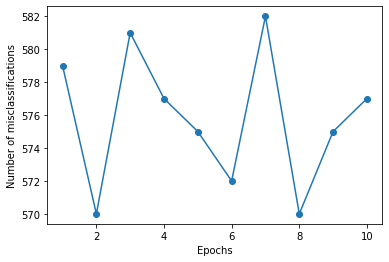

In [50]:
pn = Perceptron(0.1, 10)
pn.fit(X,y)
plt.plot(range(1,len(pn.errors) +1), pn.errors, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of misclassifications")
plt.show();

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?